# Tech Stock Market Analysis

Data: https://finance.yahoo.com

Task: Analyse and visualise 2019 technology stocks data and make future price predictions using Monte Carlo method

Personal Objective: Combine personal finance interest with data analysis and visualisation utilizing Python

For the respective stocks, the following questions will be addressed:
1. What was the change in price of the respective stocks in 2019?
2. What was the daily return of the respective stocks on average in 2019?
3. What was the moving average of the various stocks in 2019?
4. What was the correlation between different stocks' closing prices? What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

# Date and Python Version: 2020-01-14 and Python 3.7.4

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import pandas_datareader as pdr
from pandas_datareader import DataReader

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

In [2]:
# Grab tech stock data from Yahoo
tech_list = ['AAPL','GOOG','MSFT','AMZN','FB']

end = datetime(2020,1,1)
start = datetime(2019,1,2)

for stock in tech_list:   
    
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [3]:
# Exemplary descriptive statistics Apple
# Summary statistics APPL
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,209.831707,206.271627,207.869087,208.255952,2.803094e+07,207.016527
std,34.485503,34.305738,34.373583,34.538978,1.082410e+07,35.191141
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,187.832500,183.517506,185.127502,186.019997,2.097520e+07,184.385265
50%,204.715004,201.595001,203.139999,203.014999,2.587750e+07,201.779228
75%,225.040001,221.307495,223.494999,223.684998,3.201988e+07,223.015446
max,293.970001,289.519989,291.119995,293.649994,9.131220e+07,293.649994


In [4]:
# General info APPL
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-01-02 to 2019-12-31
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


# 1. Basic Price Analysis and Moving Averages

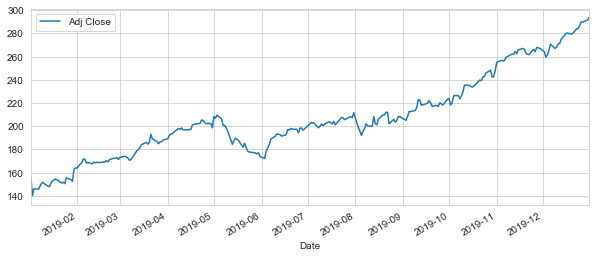

In [5]:
# Historical view closing price APPL in 2019
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

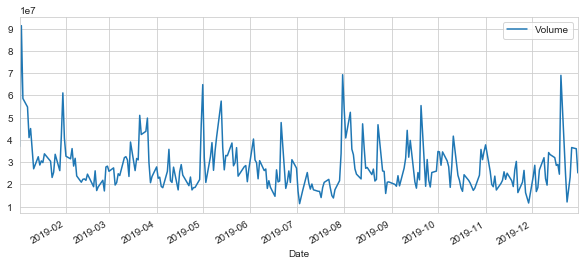

In [6]:
# Total volume APPL per day in 2019
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Above we visualised the 2019 daily closing price and total trading volume of the AAPL stock (Apple).

In [7]:
# Moving Averages APPL in 2019 10,20,50
ma_day = [10,20,50,100]

for ma in ma_day:
    
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

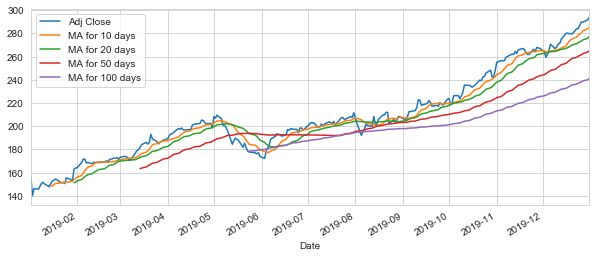

In [8]:
# Plot MAs
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

A basic moving average visualisation for AAPL shows that, due to the small dataset of only one year as well as the small moving average intervals selected, the moving averages closely follow the AAPL general price movements of 2019.

# 2. Daily Return Analysis and Correlations

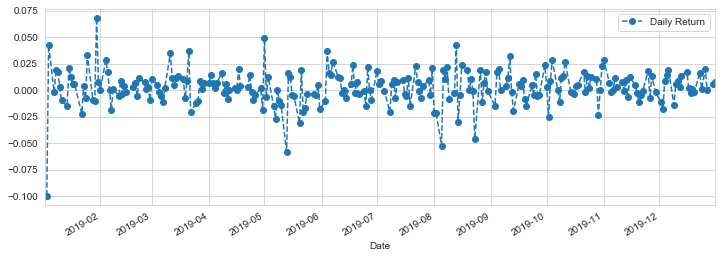

In [9]:
# Use pct_change for respective daily return
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

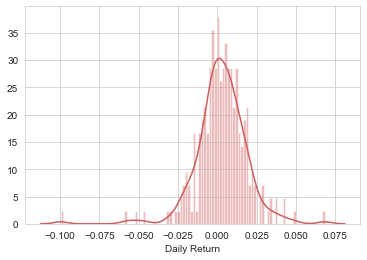

In [10]:
# Drop NaN for seaborn and plot manipulated data
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='indianred')

In [11]:
# Build new DataFrame with closing prices of all respective stocks
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN','FB'],'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2019-01-02,155.582367,1045.849976,99.646614,1539.130005,135.679993
2019-01-03,140.085220,1016.059998,95.980820,1500.280029,131.740005
2019-01-04,146.065353,1070.709961,100.444817,1575.390015,137.949997
2019-01-07,145.740265,1068.390015,100.572922,1629.510010,138.050003
2019-01-08,148.518509,1076.280029,101.302139,1656.579956,142.529999


In [12]:
# new DataFrame for returns of all respective stocks
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242,-0.029039
2019-01-04,0.042689,0.053786,0.046509,0.050064,0.047138
2019-01-07,-0.002226,-0.002167,0.001275,0.034353,0.000725
2019-01-08,0.019063,0.007385,0.007251,0.016612,0.032452


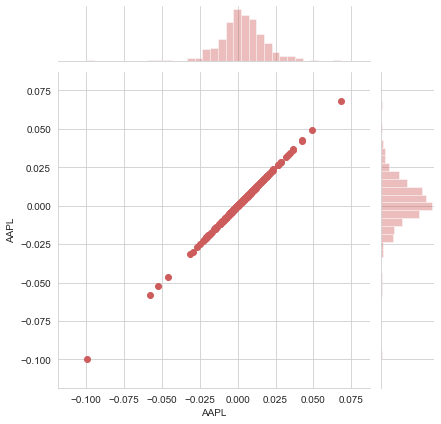

In [13]:
# Compare Apple's daily returns to itself for assumed perfect correlation via jointplot
sns.jointplot('AAPL','AAPL',tech_rets,kind='scatter',color='indianred')

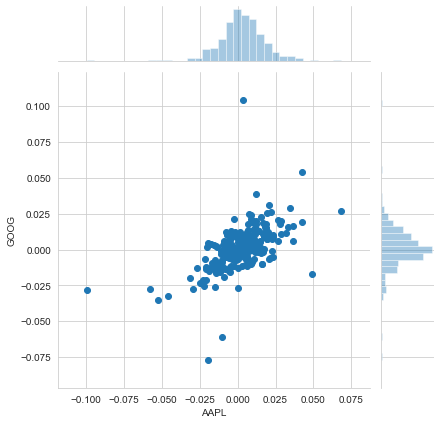

In [14]:
# Compare two different stocks' daily returns - Apple and Google
sns.jointplot('AAPL','GOOG',tech_rets,kind='scatter')

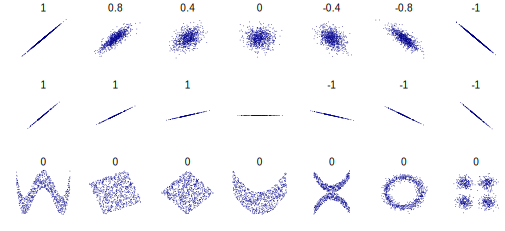

In [15]:
# Visual display of different possible p-values for above plot
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

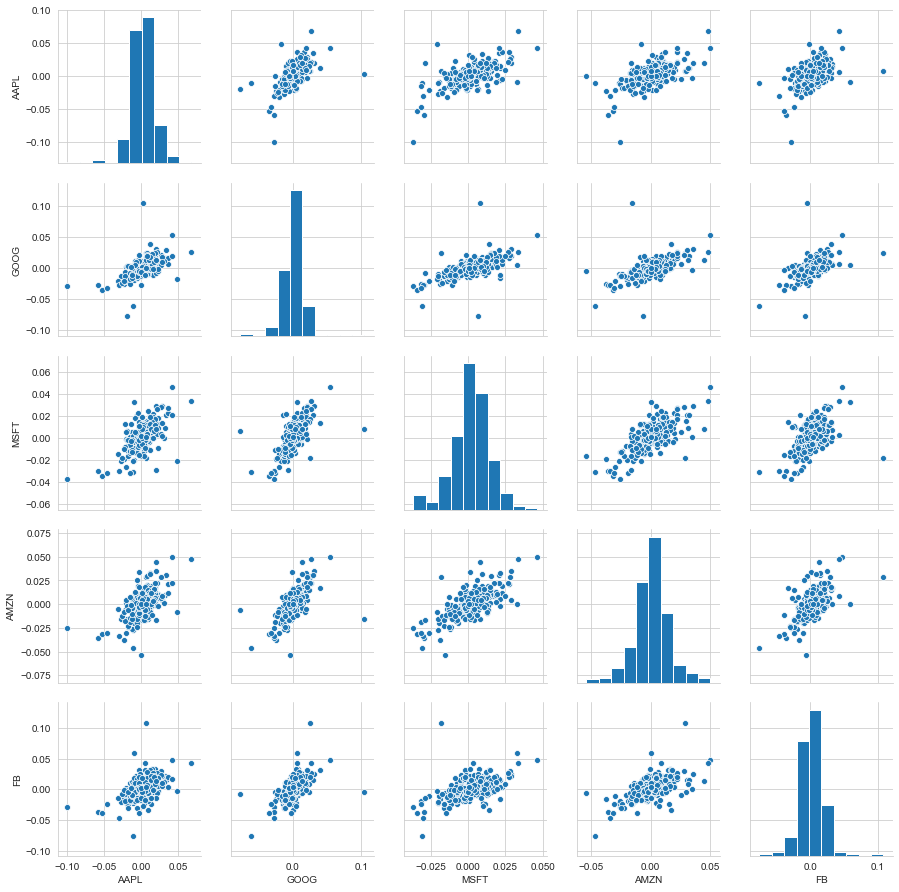

In [16]:
# Compare all respective stocks' daily returns 
# Drop possible 'NaN' values
sns.pairplot(tech_rets.dropna())

The above visualisation gives a first indication of which stocks daily returns for the year 2019 are correlated / inversely correlated. In an initial observation, Microsoft and Amazon's daily returns seem to be correlated with Google's daily returns.

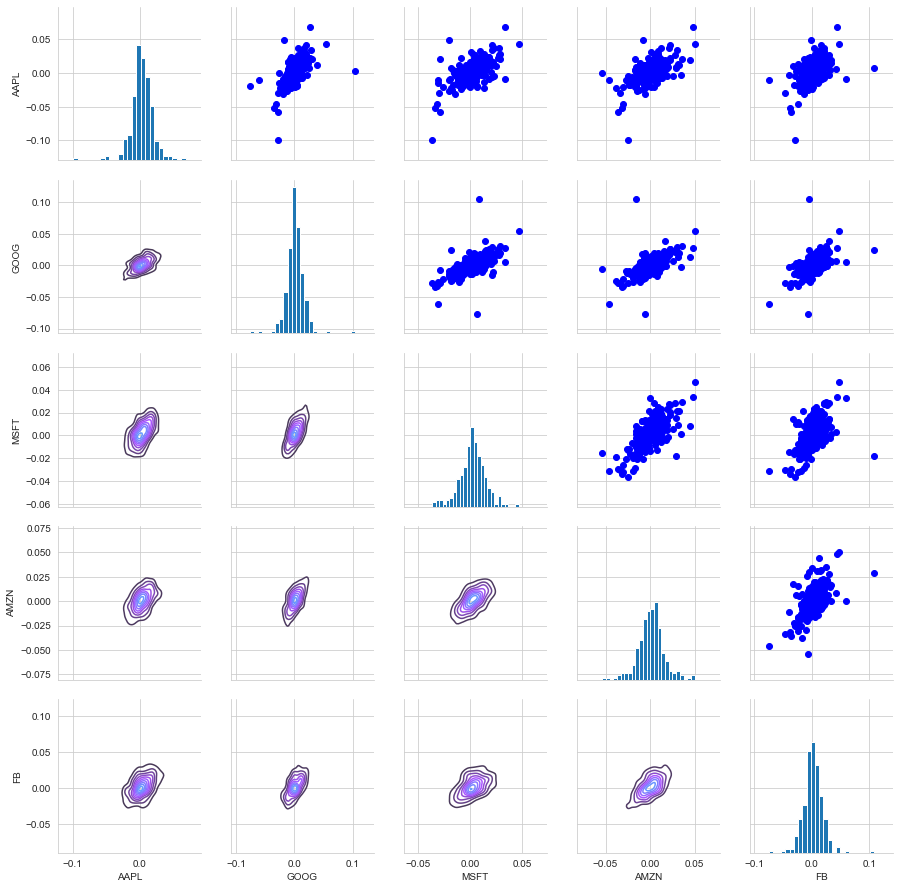

In [17]:
# Utilize seaborn's PairGrid instead of PairPlot to compare all respective stocks' daily returns 
# Drop possible 'NaN' values
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='blue')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=25)

The above visualisation provides the same initial observation as the previously selected pairplot, namely that Microsoft's and Amazon's daily returns seem to be correlated with Google's daily returns.

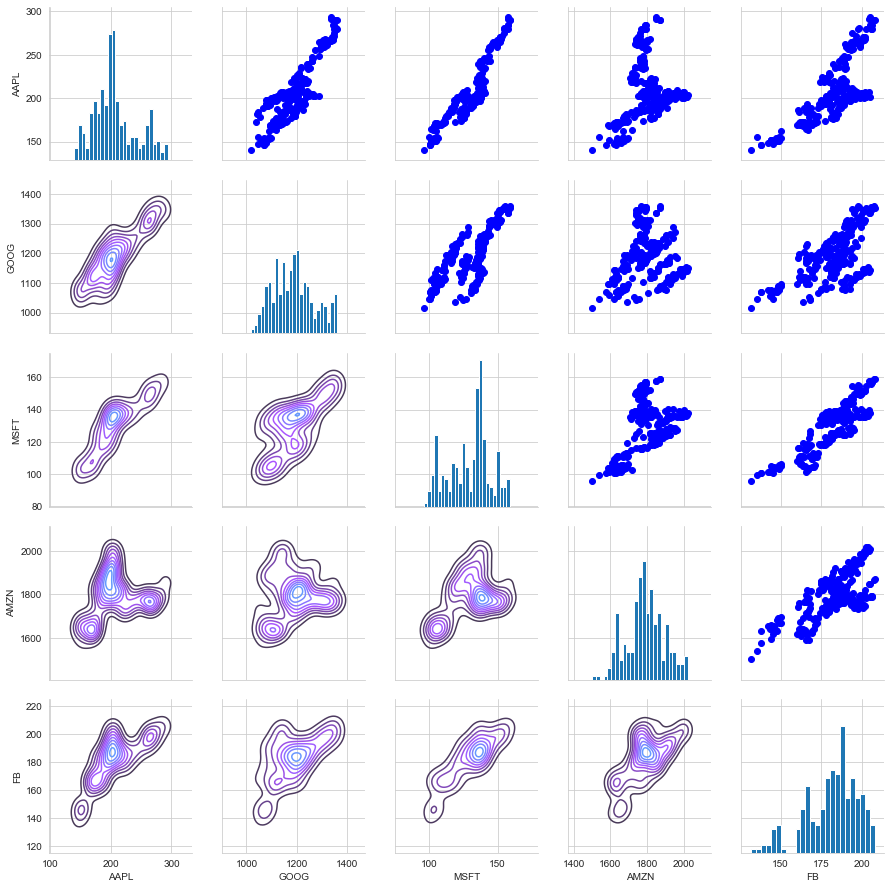

In [18]:
# Utilize seaborn's PairGrid to compare all respective stocks' daily closing prices
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='blue')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=25)

In regards to closing price, there seems to be little correlation amongst the selected technology stocks; except for Google and Microsoft, their closing price seems to be correlated with Apple's closing price.

# 3. Risk

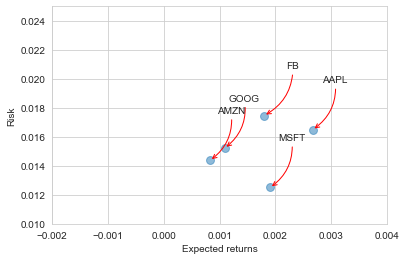

In [19]:
# Basic risk analysis
# Compare expected return with standard deviation of the return
rets = tech_rets.dropna()
area = np.pi*20

# Scatter plot
plt.scatter(rets.mean(),rets.std(),alpha = 0.5,s =area)

# Set x,y boundaries
plt.xlim([-0.002,0.004])
plt.ylim([0.01,0.025])

# Set x,y labels
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    
    plt.annotate(
        label, 
        xy = (x, y), xytext = (35, 45),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->' , connectionstyle = 'arc3,rad=-0.3', color = 'red'))

In hindsight, Microsoft seems to have had a preferable investment case in 2019. It shows the lowest risk between all five tech stocks while simultaneously having the 3rd highest expected returns based on thepreviously calculated daily returns. 

# 3.1 Value at risk and future price prediction using Monte Carlo method

Wikipedia: 
Value at risk (VaR) is a measure of the risk of loss for investments. It estimates how much a set of investments might lose (with a given probability), given normal market conditions, in a set time period such as a day. VaR is typically used by firms and regulators in the financial industry to gauge the amount of assets needed to cover possible losses.

For this exercise, value at risk (VaR) is treated as the amount of money that we can expect to lose for a given confidence interval.

Value at risk using the "bootstrap" method:

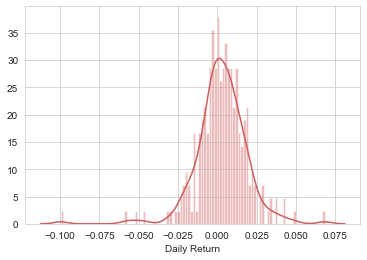

In [20]:
# Daily returns histogram for Apple
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='indianred')

In [21]:
# Returns DataFrame overview
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242,-0.029039
2019-01-04,0.042689,0.053786,0.046509,0.050064,0.047138
2019-01-07,-0.002226,-0.002167,0.001275,0.034353,0.000725
2019-01-08,0.019063,0.007385,0.007251,0.016612,0.032452
2019-01-09,0.016982,-0.001505,0.014300,0.001714,0.011927


In [22]:
# Calculate Apple stock worst daily loss with 99% confidence
rets['AAPL'].quantile(0.01)

-0.049284166340777924

Result: the 0.01 empirical quantile of daily returns is -0.049, meaning, that with 99% confidence the worst daily loss will not exceed 4.9%. With an one million dollar investment, the one-day 1% VaR is 0.049 * 1,000,000 = $49,000.

Value at Risk using the Monte Carlo method:

The Monte Carlo method is used to run several trials (drift & shock) with randomized market conditions and respective calculations of portfolio losses for each trial. Thereafter, results are aggregated to establish how risky the selected stock is.

In [23]:
# Build function
days=365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [24]:
# Build function
def monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price

    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for x in range(1,days):
          
        drift[x] = mu * dt
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [25]:
# To get Google stock opening price 2019
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015
2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900,1076.280029


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

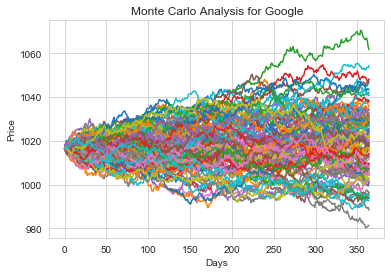

In [26]:
# Run Monte Carlo simulation with 100 runs
start_price = 1016.57

for run in range(100):
    
    plt.plot(monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [27]:
# Run Monte Carlo simulation with 2,000 runs
runs = 2000
simulations = np.zeros(runs)

for run in range(runs):
    
    simulations[run]=monte_carlo(start_price,days,mu,sigma)[days-1]

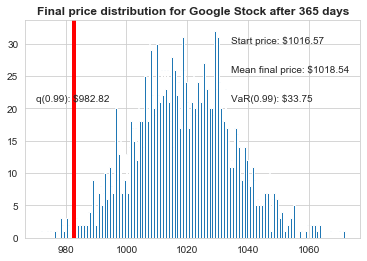

In [28]:
# Plot above Monte Carlo simulation with 2,000 runs
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8,s='Start price: $%.2f' % start_price)
plt.figtext(0.6, 0.7,'Mean final price: $%.2f' % simulations.mean())
plt.figtext(0.6, 0.6,'VaR(0.99): $%.2f' % (start_price - q,))
plt.figtext(0.15, 0.6,'q(0.99): $%.2f' % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title('Final price distribution for Google Stock after %s days' % days, weight='bold');

With 2,000 runs, the 1% empirical quantile of the final price distribution to estimate the VaR for the Google stock is USD 33.75 for every investment of USD 1,016.57 (price of one Google stock in this exercise). In simplified terms this menas that for every initial Google stock purchased, USD 33.75 is put at risk in 99% of the time based on the above Monte Carlo Simulation.

# 4. Summary

We started this exercise with the objective of utilizing pandas, seasborn and matplotlib to analyse the 2019 data of five selected technology stocks (Apple, Google, Microsoft, Amazon and Facebook). Hence, we analysed the data as well as visualised findings about its descriptive statistics, followed by more advanced calculations and visualisations about the underlying stocks' correlations, investment risks as well as future price predictions. 